In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_path = '../input/titanic/train.csv'
test_path = '../input/titanic/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Which feature should be used to train the model?

**Age:**

Distribution of passenger's ages

Text(0.5, 1.0, 'Distribution of Age of Passengers')

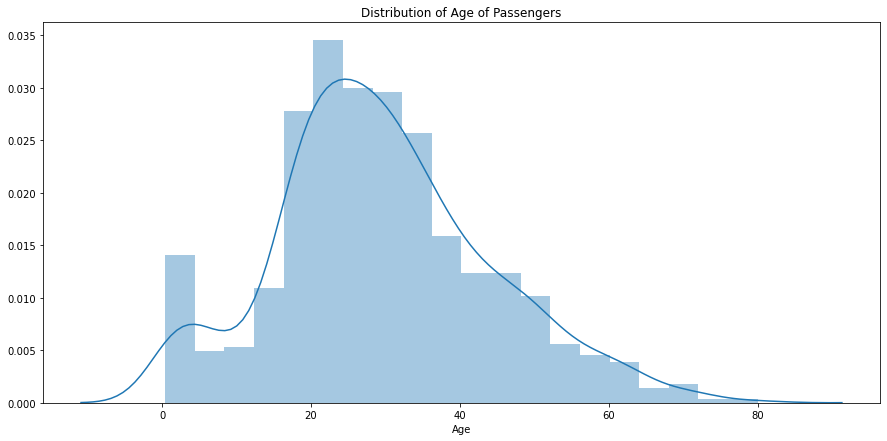

In [6]:
age = train_df['Age']

fig, ax_age = plt.subplots(figsize = (15, 7))

sns.distplot(age, ax = ax_age)

ax_age.set_title('Distribution of Age of Passengers')

Text(0.5, 1.0, 'Dead')

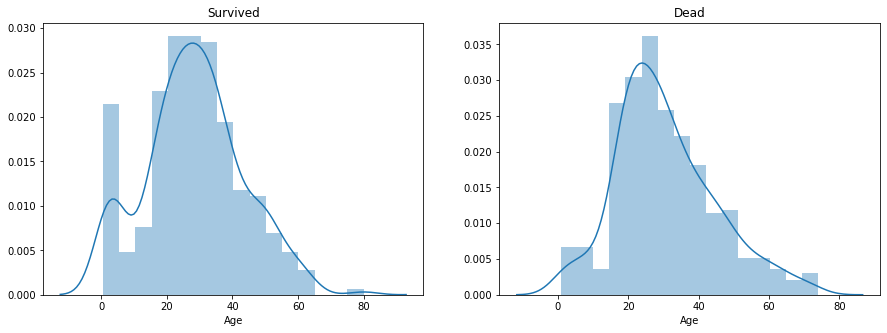

In [7]:
live = train_df.loc[train_df['Survived'] == 1]
death = train_df.loc[train_df['Survived'] == 0]

fig, (ax_age_live, ax_age_death) = plt.subplots(1,2, figsize = (15, 5))
sns.distplot(live['Age'], ax = ax_age_live)
sns.distplot(death['Age'], ax = ax_age_death)

ax_age_live.set_title('Survived')
ax_age_death.set_title('Dead')

* Children under age 4 has a high survive rate.
* Most people are with the age between 20 and 36.
* Large number of death occured between age 16 to 32.

Conclusion:
We should consider Age in our model.

**Gender:**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

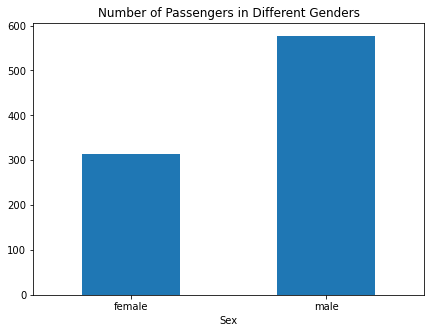

In [8]:
gender = train_df.groupby('Sex').count()

fig, ax_age = plt.subplots(figsize = (7,5))
gender['PassengerId'].plot.bar(ax = ax_age)

ax_age.set_title('Number of Passengers in Different Genders')
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Female')

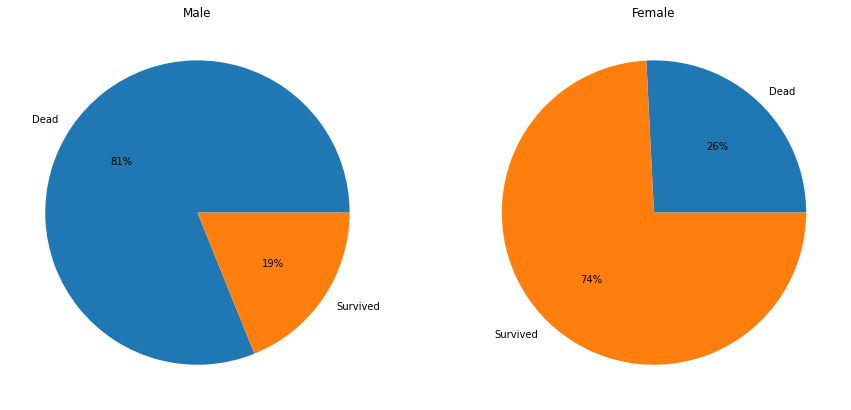

In [9]:
male = train_df.loc[train_df['Sex'] == 'male']
female = train_df.loc[train_df['Sex'] == 'female']

fig, (ax_male_death_rate, ax_female_death_rate) = plt.subplots(1,2,figsize = (15, 7))

male_rate = male.groupby('Survived').count()
female_rate = female.groupby('Survived').count()

label = ['Dead','Survived']
ax_male_death_rate.pie(male_rate['PassengerId'],labels = label, autopct = '%1.0f%%' )
ax_female_death_rate.pie(female_rate['PassengerId'],labels = label, autopct = '%1.0f%%' )

ax_male_death_rate.set_title('Male')
ax_female_death_rate.set_title('Female')

* There are more male passengers on boarded.
* Female passengers have a much higher survive rate.

Conclusion: We should consider gender in our model.

**PClass:**

In [10]:
train_df['Pclass'].unique()

array([3, 1, 2])

Text(0.5, 1.0, 'Pclass1, Dead')

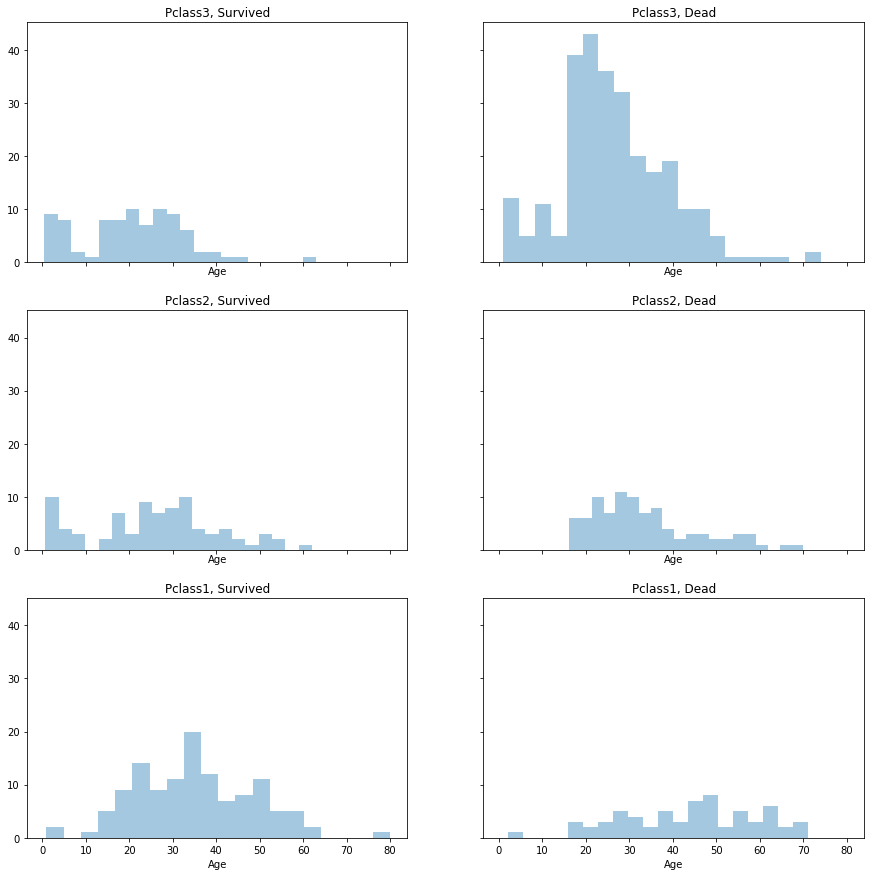

In [11]:
death = train_df.loc[train_df['Survived'] == 0]
live = train_df.loc[train_df['Survived'] == 1]

fig, ((ax_3_live, ax_3_death),
     (ax_2_live, ax_2_death),
     (ax_1_live, ax_1_death)) = plt.subplots(3,2,figsize = (15, 15), sharey = True, sharex = True)

p3_death = death.loc[death['Pclass'] == 3]
p3_live = live.loc[live['Pclass'] == 3]
p2_death = death.loc[death['Pclass'] == 2]
p2_live = live.loc[live['Pclass'] == 2]
p1_death = death.loc[death['Pclass'] == 1]
p1_live = live.loc[live['Pclass'] == 1]

sns.distplot(p3_death['Age'],ax = ax_3_death, kde = False, bins = 20)
sns.distplot(p3_live['Age'], ax = ax_3_live, kde = False, bins = 20)
sns.distplot(p2_death['Age'],ax = ax_2_death, kde = False, bins = 20)
sns.distplot(p2_live['Age'], ax = ax_2_live, kde = False, bins = 20)
sns.distplot(p1_death['Age'],ax = ax_1_death, kde = False, bins = 20)
sns.distplot(p1_live['Age'], ax = ax_1_live, kde = False, bins = 20)

ax_3_live.set_title('Pclass3, Survived')
ax_3_death.set_title('Pclass3, Dead')
ax_2_live.set_title('Pclass2, Survived')
ax_2_death.set_title('Pclass2, Dead')
ax_1_live.set_title('Pclass1, Survived')
ax_1_death.set_title('Pclass1, Dead')

* Pclass 3 has the most number of death.
* All children under age of 10 in Pclass 2 survived.
* Pclass 1 has the most survivors. We can tell that the survivors is way more than death in Pclass 1. 
* The oldest person on boarded survived, and he is in Pclass 1.

Conclusion: We should consider Pcalss in our model.

**Embarked:**

In [12]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Text(0.5, 1.0, 'Number of Passengers from Each Port')

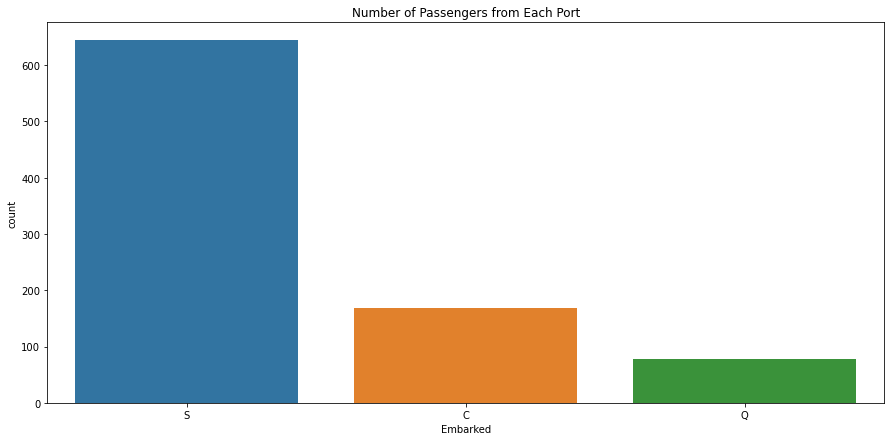

In [13]:
fig, ax_embarked = plt.subplots(figsize = (15, 7))
sns.countplot(x = 'Embarked', data = train_df)

ax_embarked.set_title('Number of Passengers from Each Port')

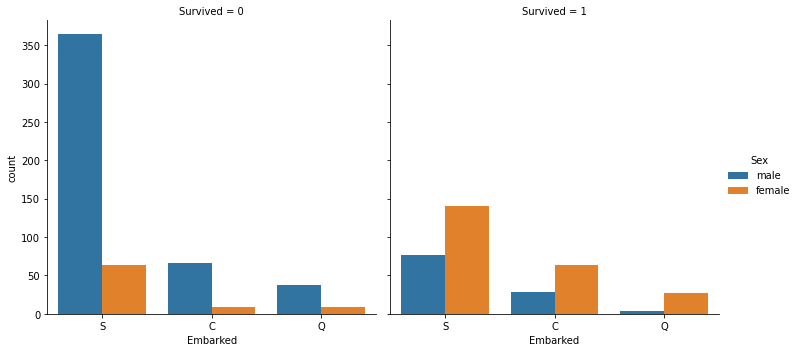

In [14]:
sns.catplot(x = 'Embarked', hue = 'Sex', col = 'Survived', data = train_df, kind = 'count')

Text(0.5, 1.0, 'Number of Passenger in each Class from each Port')

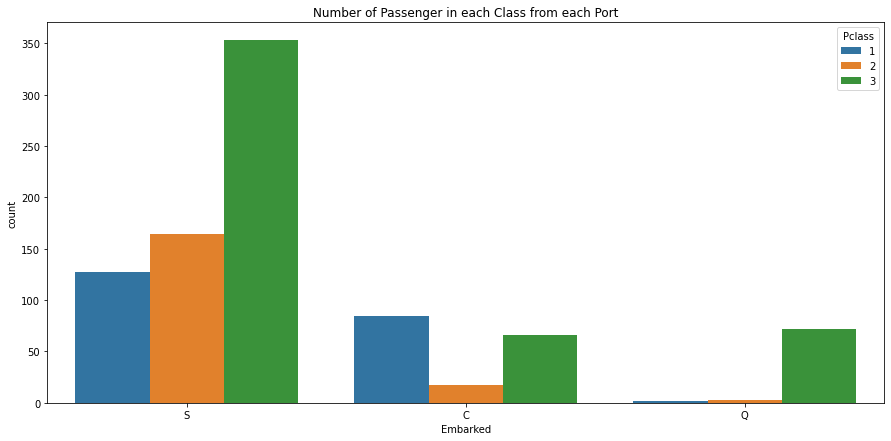

In [15]:
fig, ax_embarked_class = plt.subplots(figsize = (15, 7))
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train_df)

ax_embarked_class.set_title('Number of Passenger in each Class from each Port')

* Most passenger came boarded from Southampton.
* Passengers from Southampton suffered the most death rate.
* Most passengers in Pclass 3 came from Southampton, this would explain why Southampton has the highest death rate.
* Female passengers have lower death rate than men for all three ports.

Conclusion: We would consider embarked in our model.

# Data Cleaning:

In [16]:
fig = ['Age', 'Sex', 'Pclass', 'Embarked', 'Survived']
test_fig = ['Age', 'Sex', 'Pclass', 'Embarked']
train = train_df[fig]
test = test_df[test_fig]

Fill missing age with mean:

In [17]:
train['Age'].fillna(value = train['Age'].mean(), inplace = True)
test['Age'].fillna(value = test['Age'].mean(), inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Handle Categorical Data:

In [18]:
from sklearn.preprocessing import LabelEncoder

obj_col = ['Sex','Embarked']

label_encoder = LabelEncoder()
for col in obj_col:
    train[col] = label_encoder.fit_transform(train[col].astype(str))
    test[col] = label_encoder.fit_transform(test[col].astype(str))
train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Sex,Pclass,Embarked,Survived
0,22.0,1,3,2,0
1,38.0,0,1,0,1
2,26.0,0,3,2,1
3,35.0,0,1,2,1
4,35.0,1,3,2,0


# Train Model:

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
fig = ['Age', 'Sex', 'Pclass', 'Embarked']
X = train[fig]

y = train['Survived']

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

# Result:

In [21]:
prediction = model.predict(test)

res_df = pd.DataFrame({'PassengerId': test_df['PassengerId'],
                     'Survived': prediction})
res_df.to_csv('my_submission.csv', index = False)

print("Submission saved Successfully")

Submission saved Successfully


In [22]:
res_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
